<a href="https://colab.research.google.com/github/Sanchell1o/Statistics-and-Data-Analysis/blob/main/lab-2/notebooks/lab-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Статистика для анализа данных**

## **Лабораторная работа №2**  
###**Описательная статистика**


---


**Работу выполнили студенты :**
  - Бабич Александр Петрович, ИСУ: 412882,  Практический поток: 1.3  
  - Московкин Александр Николаевич, ИСУ: 472264,  Практический поток: 1.3  

### **Ход работы**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.facecolor': '#f5f5f5',
    'axes.edgecolor': '0.4'
})

In [3]:
def plot_hist(data, title, color):
    plt.figure(figsize=(12, 7))
    ax = plt.gca()

    n, bins, patches = ax.hist(
        data,
        bins='auto',
        density=True,
        color=color,
        alpha=0.85,
        edgecolor='black',
        linewidth=1.2,
        zorder=2
    )

    ax.set_title(title, pad=20, color='#2e3440')
    ax.set_xlabel('Значения', labelpad=15)
    ax.set_ylabel('Плотность вероятности', labelpad=15)

    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', alpha=0.2, zorder=1)
    ax.grid(which='major', alpha=0.4, zorder=1)
    ax.tick_params(axis='both', which='both', labelsize=12)

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for patch in patches:
        patch.set_hatch('////')
        patch.set_edgecolor('white')

    plt.tight_layout()
    plt.show()

# **1. Выберите два распределения (одно дискретное, другое непрерывное). Сгенерируйте, используя библиотеки, выборку из N = 1000 значений для каждого из распределений.**

In [4]:
np.random.seed(42) # Автостопом часть 2)
n = 1000 # Ну тыща же

### 1.1 Дискретное распредление:
**Распределение Пуассона задаётся по формуле:**
$$
f(x) = \frac{\lambda^x e^{-\lambda}}{x!}
$$
где $\lambda$ - среднее значение, а $x$ - количество событий.

In [5]:
lambda_poisson = 10.5 # среднее значение
poisson_data = np.random.poisson(lambda_poisson, size=n)

Визуализируем

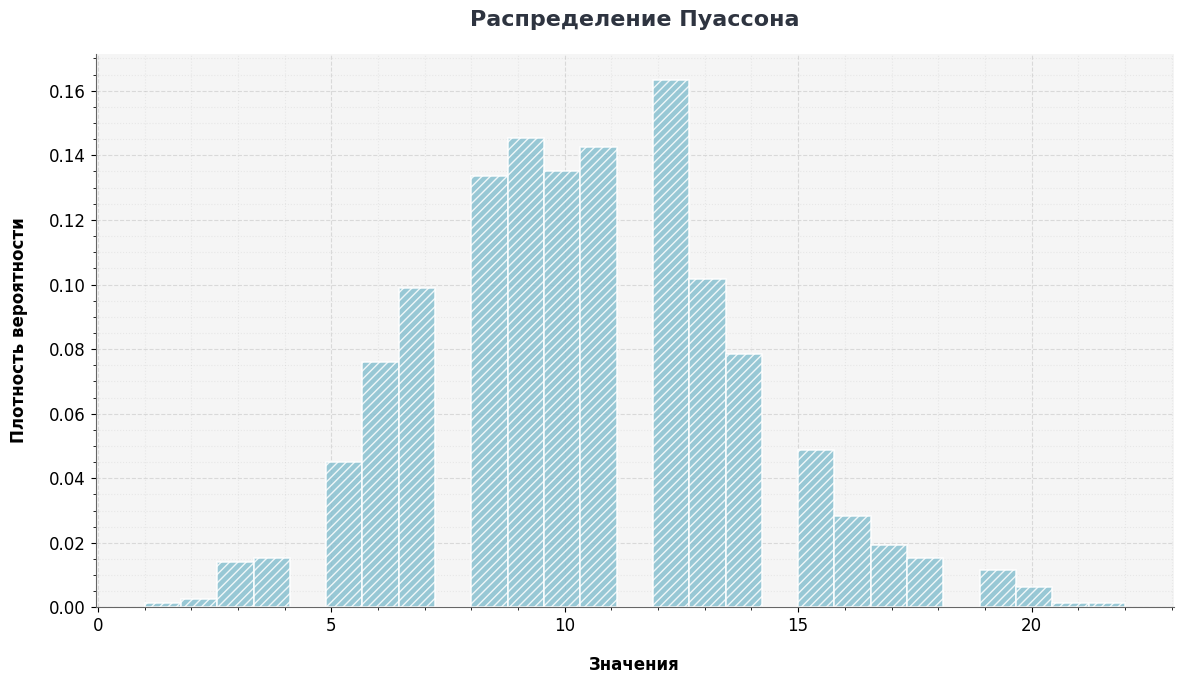

In [6]:
plot_hist(
    poisson_data,
    title='Распределение Пуассона',
    color='#88c0d0'
)

### 1.2 Непрерывное распредление:
**Нормальное распределение задаётся по формуле:**
$$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
где $\mu$ - математическое ожидание, $\sigma$ - стандартное отклонение.

In [7]:
mu = 10 # Среднее значение
sigma = 1.5 # Стандартное отклонение
normal_data = np.random.normal(mu, sigma, size=n)

Визуализируем

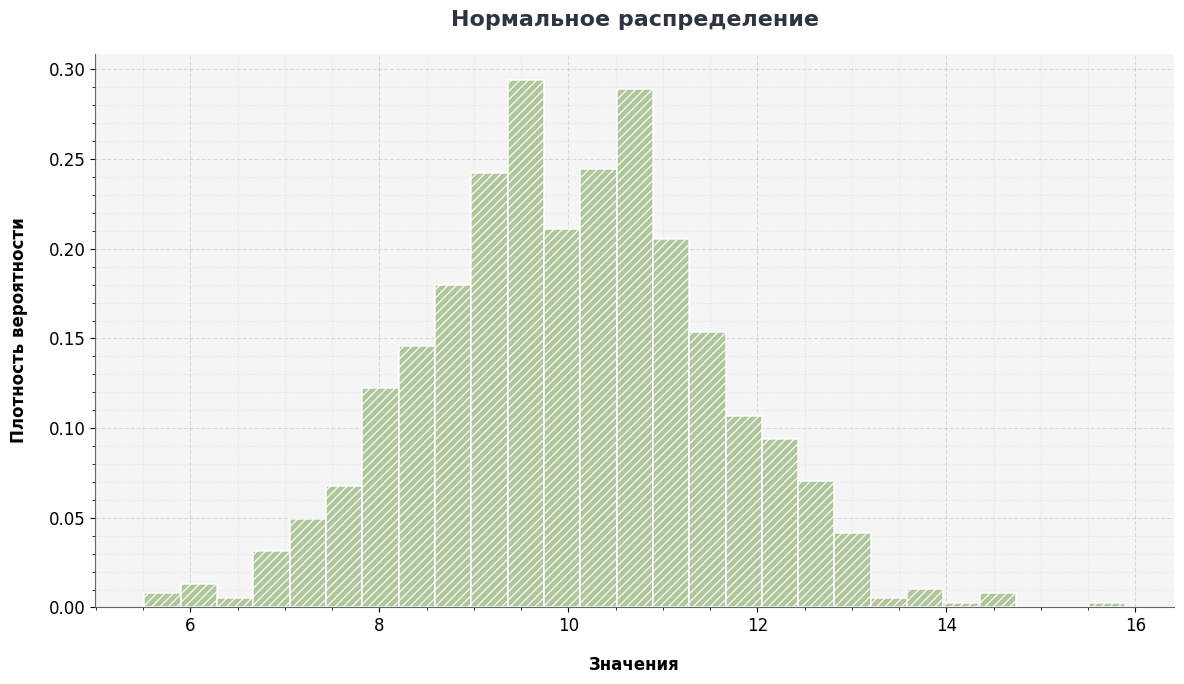

In [8]:
plot_hist(
    normal_data,
    title='Нормальное распределение',
    color='#a3be8c'
)

## Выводы
По гистограммам видно, что распределение Пуассона имеет ассиметричную форму, а нормальное более симметрично.

# **2. Для каждой выборки:**


## a) Рассчитайте основные описательные статистики:


1.  Квартили: Q1, Q2, Q3.
2.  Меры центральной тенденции: выборочное среднее, медиана, мода.
3. Меры вариабельности: размах выборки, интерквартильный размах, дисперсия, стандартное отклонение, коэффициент вариации, среднее абсолютное отклонение.
4. Меры формы распределения: коэффициенты асимметрии, эксцесса.
5. Первые 5 начальных и центральных моментов (допускается использование смещенных характеристик).



In [9]:
def get_stats(data):

    # Квартили
    Q1 = np.percentile(data, 25)  # 25-й процентиль
    Q2 = np.percentile(data, 50)  # 50-й процентиль (медиана)
    Q3 = np.percentile(data, 75)  # 75-й процентиль

    # Меры центральной тенденции
    mean = np.mean(data)  # выборочное среднее
    median = np.median(data)  # медиана
    mode = stats.mode(data, keepdims=True).mode[0]  # мода

    # Меры вариабельности
    range = np.max(data) - np.min(data)  # размах выборки
    iqr = Q3 - Q1  # интерквартильный размах
    variance = np.var(data)  # дисперсия
    std_dev = np.std(data)  # стандартное отклонение
    cv = std_dev / mean  # коэффициент вариации
    std = np.mean(np.abs(data - mean))  # среднее абсолютное отклонение

    # Меры формы распределения
    skewness = stats.skew(data)  # коэффициент асимметрии
    kurtosis = stats.kurtosis(data)  # коэффициент эксцесса

    # Первые 5 начальных и центральных моментов
    moments = [np.mean(data), np.var(data), stats.skew(data),
               stats.kurtosis(data),
               np.mean(np.abs(data - mean))]  # первые 5 моментов

    # ну шо б красиво было
    result = pd.DataFrame({
        'Статистический показатель': ['Q1', 'Q2', 'Q3', 'Выборочное среднее', 'Медиана', 'Мода', 'Размах выборки',
                           'Интерквартильный размах', 'Дисперсия', 'Стандартное отклонение', 'Коэффициент вариации',
                           'Cреднее абсолютное отклонение', 'Коэффициент асимметрии', 'Коэффициент эксцесса',
                           'Первый момент', 'Второй момент', 'Третий момент', 'Четвертый момент', 'Пятый момент'],
        'Значение': [Q1, Q2, Q3, mean, median, mode, range,
                     iqr, variance, std_dev, cv, std, skewness,
                     kurtosis, moments[0], moments[1], moments[2], moments[3],
                     moments[4]]
    })
    result.set_index('Статистический показатель', inplace=True)
    return result

### Дискретное (Пуассончик)

Выведем основные описательные статистики для дискретного распределения

In [10]:
poisson_stats = get_stats(poisson_data)
poisson_stats

,Значение
Статистический показатель,
Q1,8.000000
Q2,10.000000
Q3,12.000000
Выборочное среднее,10.386000
Медиана,10.000000
Мода,12.000000
Размах выборки,21.000000
Интерквартильный размах,4.000000
Дисперсия,11.117004


Данные полностью подтверждают визуализацию.  Распределение имеет слабую правостороннюю асимметрию с основным кластером значений вблизи медианы (8–12). Умеренная вариативность и близость эксцесса к нулю позволяют считать распределение приближённым к нормальному, но с потенциальными выбросами в правом хвосте.

### Непрерывное (Нормальное)

Выведем основные описательные статистики для нормального распределения

In [11]:
normal_stats = get_stats(normal_data)
normal_stats

,Значение
Статистический показатель,
Q1,9.025793
Q2,10.010397
Q3,10.982684
Выборочное среднее,10.008959
Медиана,10.010397
Мода,5.513296
Размах выборки,10.376061
Интерквартильный размах,1.956890
Дисперсия,2.205131


Так как дано нормальное распределение, то данные  почти идеальны и симметричны.  Распределение имеет сдвиг вправо. Это подтверждается значениями квартилей, среднего, медианы. Моды является нерепрезентативным показателем, так как в выборке нет повторяющихся значений. Коэффициент вариации также не является репрезентативным показателем, так как выборка имеет среднее равное 10.

## b) Постройте графики:
1. Эмпирическую функцию распределения eCDF с наложением ее на теоретическую
CDF
2. Эмпирическую плотность распределения (гистограмму) ePDF для непрерывного распределения с наложением ее на теоретическую PDF;
Постройте несколько вариантов гистограммы: с автоматическим выбором количества
бинов, с выбором по одной из известных формул и подберите вручную какое-то количество, которое покажется визуально оптимальным.

3. Эмприческую функцию вероятности (многоугольник вероятности) для дискретного
распределения с наложением ее на теоретическую функцию вероятности;
4. Boxplot с выделением выбросов (по правилу 1.5 · IQR).


### Эмпирическая функция распределения — это ступенчатая функция, которая для любой точки `x` на числовой прямой показывает долю наблюдений в выборке, меньших или равных `x`.

**Формула**:  
$$
F_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbf{1}_{\{X_i \leq x\}},
$$
где:  
- n — объём выборки,  
- $\mathbf{1}_{\{X_i \leq x\}}$ — индикаторная функция (1, если $X_i \leq x$, иначе 0).


In [12]:
def plot_ecdf(data, theoretical_cdf, title, color, dist_type):
    plt.figure(figsize=(12, 7))
    ax = plt.gca()

    x_sorted = np.sort(data)
    ecdf = np.arange(1, len(data) + 1) / len(data)
    ax.step(x_sorted, ecdf,
            where='post',
            linewidth=2.5,
            color=color,
            label='Эмпирическая CDF')

    ax.plot(theoretical_cdf[0], theoretical_cdf[1],
           'r--',
           linewidth=2.5,
           alpha=0.8,
           label='Теоретическая CDF')

    ax.set_title(title, pad=20, color='#2e3440')
    ax.set_xlabel('Значения', labelpad=15)
    ax.set_ylabel('Вероятность', labelpad=15)

    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', alpha=0.2)
    ax.tick_params(axis='both', which='both', labelsize=12)

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    ax.legend(frameon=True,
             facecolor='white',
             edgecolor='#4c566a',
             fontsize=12,
             loc='lower right')

    plt.tight_layout()
    plt.show()

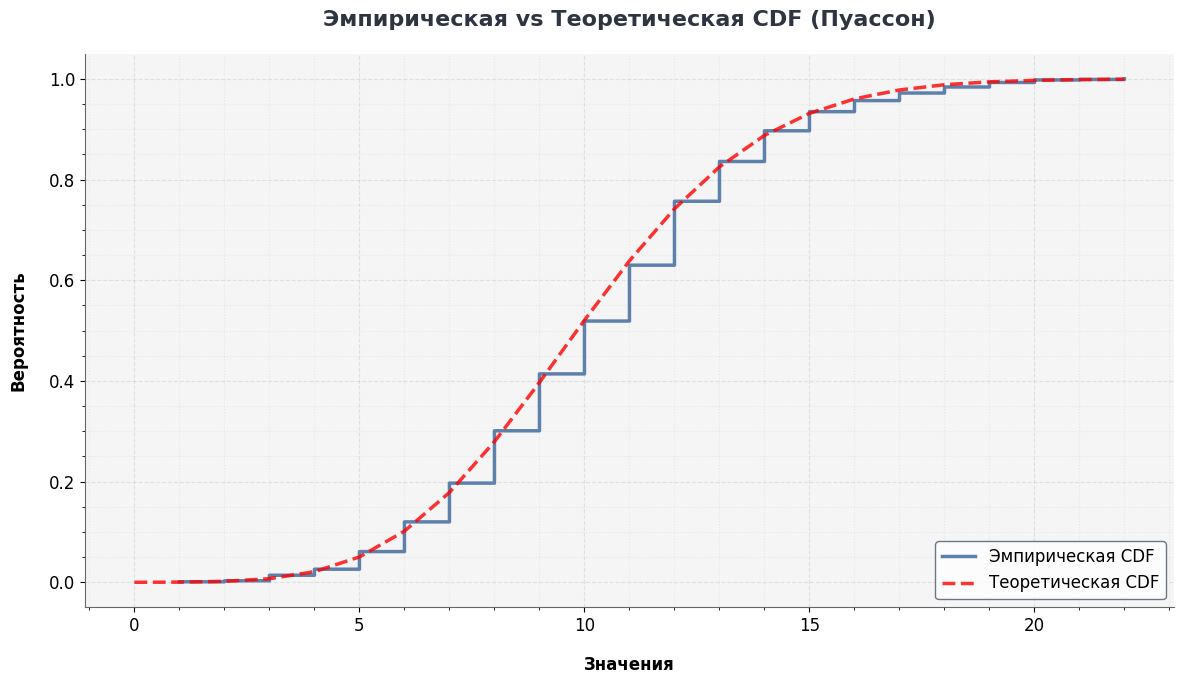

In [13]:
x_poisson = np.arange(0, np.max(poisson_data) + 1)
plot_ecdf(
    poisson_data,
    theoretical_cdf=(x_poisson, stats.poisson.cdf(x_poisson, lambda_poisson)),
    title='Эмпирическая vs Теоретическая CDF (Пуассон)',
    color='#5e81ac',
    dist_type='poisson'
)


По результатам графика видно, что эмпирическая функция распределения совпадает с теоретической. => Выборка збс

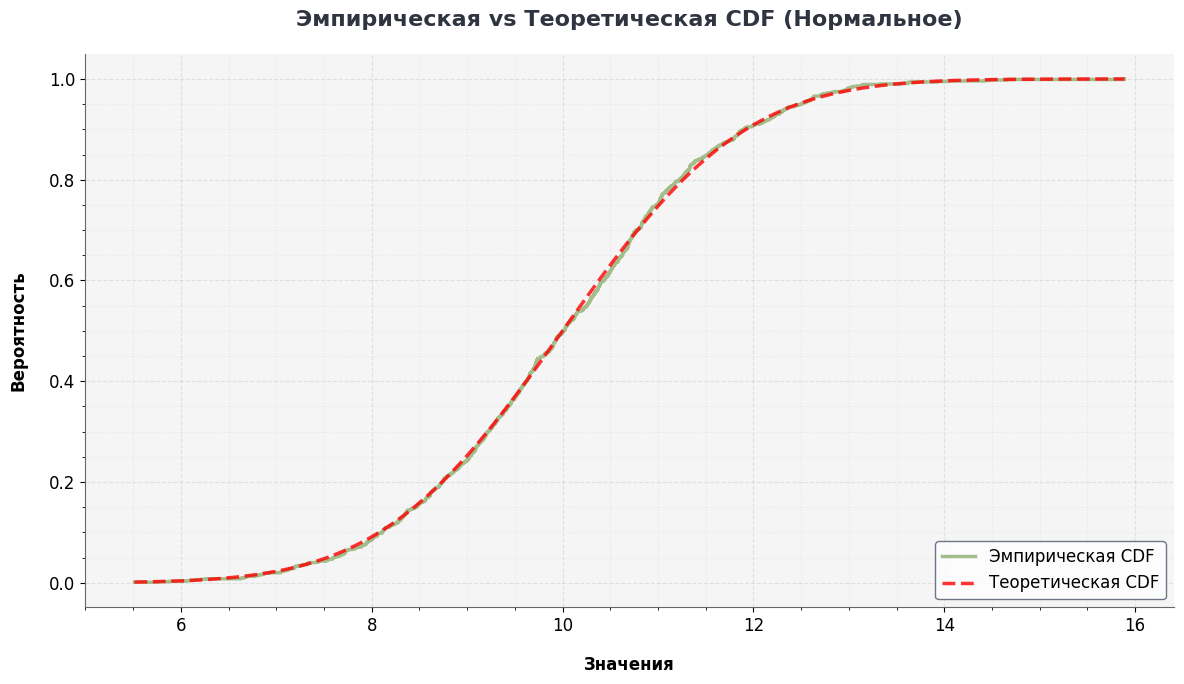

In [14]:
x_normal = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
plot_ecdf(
    normal_data,
    theoretical_cdf=(x_normal, stats.norm.cdf(x_normal, mu, sigma)),
    title='Эмпирическая vs Теоретическая CDF (Нормальное)',
    color='#a3be8c',
    dist_type='normal'
)

По графику видно почти полное совпадение эмпирической функции распределения с теоретической.

### Эмприческую функцию вероятности (многоугольник вероятности) для дискретного распределения с наложением ее на теоретическую функцию вероятности

**Эмпирическая функция вероятности** задаётся по формуле:
$$
P(X = x) = \frac {n_x}{N}
$$
где $n_x$ - количество наблюдений, равных $x$, $N$ - общее количество наблюдений

In [15]:
def plot_pmf(data, theoretical_pmf, title, color):
    plt.figure(figsize=(12, 7))
    ax = plt.gca()

    x = np.arange(0, np.max(data) + 1)
    empirical_pmf = np.array([(data == k).sum() for k in x]) / len(data)

    bars = ax.bar(x, empirical_pmf,
                 color=color,
                 alpha=0.85,
                 edgecolor='white',
                 linewidth=1.5,
                 label='Эмпирическая вероятность',
                 zorder=2)

    for bar in bars:
        bar.set_hatch('////')

    ax.plot(x, theoretical_pmf,
           'r--',
           linewidth=2.5,
           marker='o',
           markersize=6,
           markerfacecolor='white',
           markeredgecolor='red',
           label='Теоретическая вероятность',
           zorder=3)

    ax.set_title(title, pad=20, color='#2e3440')
    ax.set_xlabel('Значение', labelpad=15)
    ax.set_ylabel('Вероятность', labelpad=15)

    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', alpha=0.2)
    ax.tick_params(axis='both', which='both', labelsize=12)

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    ax.legend(frameon=True,
             facecolor='white',
             edgecolor='#4c566a',
             fontsize=12,
             loc='best')

    plt.tight_layout()
    plt.show()

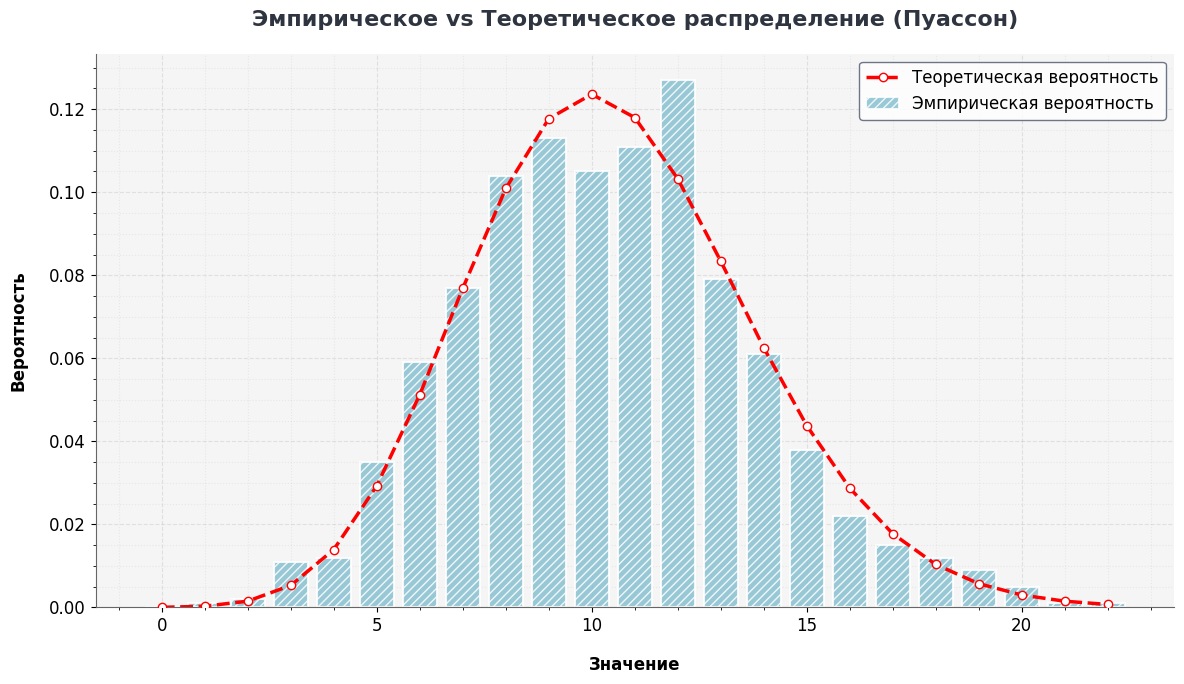

In [16]:
x_poisson = np.arange(0, np.max(poisson_data) + 1)
theoretical_pmf = stats.poisson.pmf(x_poisson, lambda_poisson)

plot_pmf(
    poisson_data,
    theoretical_pmf,
    title='Эмпирическое vs Теоретическое распределение (Пуассон)',
    color='#88c0d0'
)

В данном случае различие между эмпирической и теоретической функцией вероятности незначительное.

### Гистограммы

**Эмпирическая плотность распределения** задаётся по формуле:

$$
h_j = \frac{\#\{X_i \in B_j\}}{n \cdot |B_j|}
$$

где:
- $B_j$ — $j$-й интервал (бин),
- $|B_j|$ — длина интервала $B_j$,
- $\#\{X_i \in B_j\}$ — количество наблюдений, попавших в интервал $B_j$,
- $n$ — общее количество наблюдений.

**Формула Скотта** для выбора оптимального количества бинов в гистограмме:

$$
h = \frac{3.5 \cdot \sigma}{n^{1/3}}
$$

где:
-  h  — ширина одного бина (интервала),
- $\sigma$  — стандартное отклонение выборки,
-  n  — количество наблюдений в выборке.

Количество бинов вычисляется как:
$$
k = \frac{\text{размах выборки}}{h} = \frac{X_{\text{max}} - X_{\text{min}}}{h}
$$

In [17]:
def plot_theoretical_pdf(data, mu, sigma):
    x = np.linspace(np.min(data), np.max(data), 1000)
    theoretical_pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, theoretical_pdf,
             color='#bf616a',
             linewidth=2.5,
             label='Теоретическая PDF')

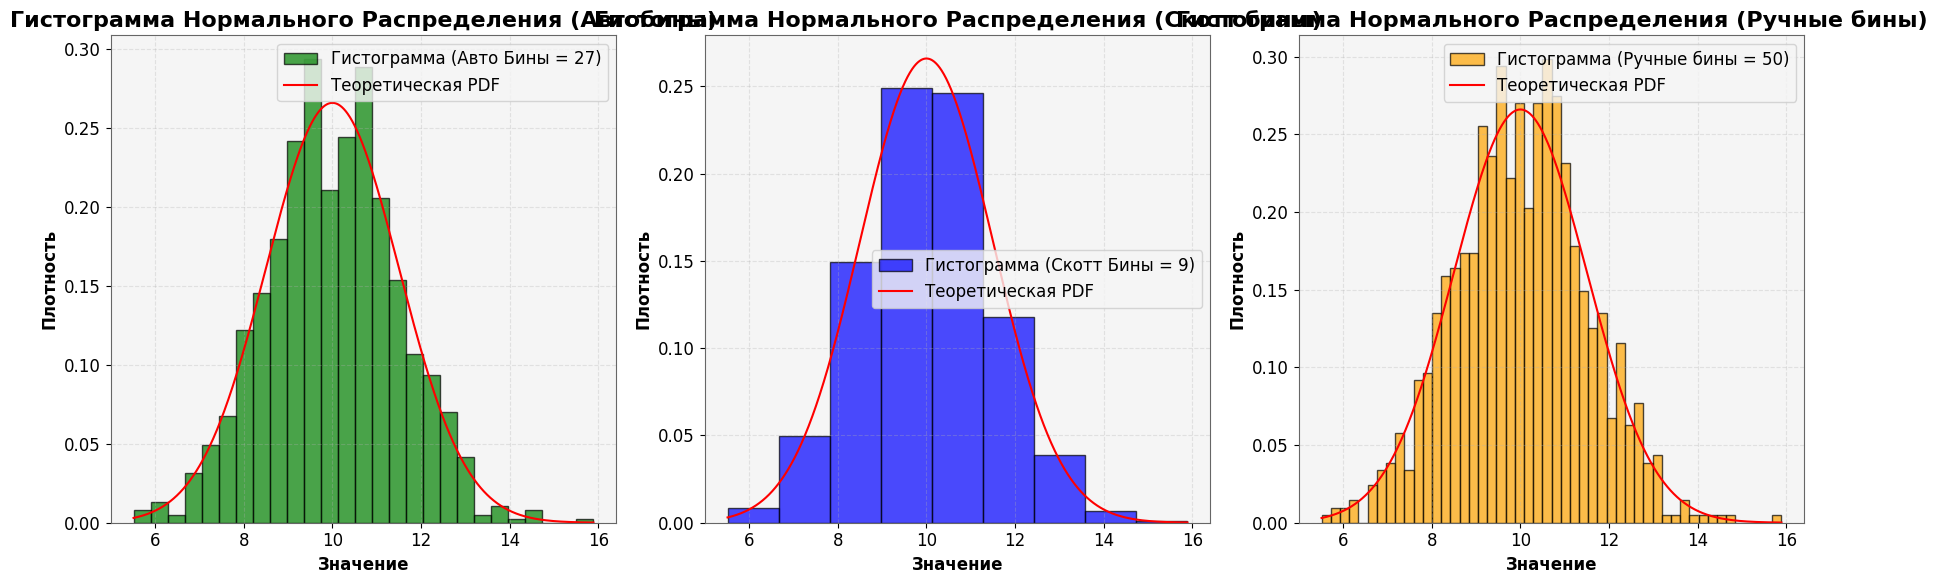

In [18]:
plt.figure(figsize=(18, 6))


def plot_teoretical_pdf():
    x = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
    theoretical_pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, theoretical_pdf, label='Теоретическая PDF', color='red')


# Автоматический выбор количества бинов
plt.subplot(1, 3, 1)
bin_edges_auto = np.histogram_bin_edges(normal_data, bins='auto')
num_bins_auto = len(bin_edges_auto) - 1
plt.hist(normal_data, bins='auto', density=True, alpha=0.7, color='green',edgecolor="black",
         label=f'Гистограмма (Aвто Бины = {num_bins_auto})')
plot_teoretical_pdf()
plt.title('Гистограмма Нормального Распределения (Aвтобины)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Выбор количества бинов по формуле Скотта
plt.subplot(1, 3, 2)
num_bins_scott = int(np.ceil((np.max(normal_data) - np.min(normal_data)) / (
        3.5 * poisson_stats.loc["Стандартное отклонение"].iloc[0] / (n ** (1 / 3)))))
plt.hist(normal_data, bins=num_bins_scott, density=True, alpha=0.7, color='blue',edgecolor="black",
         label=f'Гистограмма (Скотт Бины = {num_bins_scott})')
plot_teoretical_pdf()
plt.title('Гистограмма Нормального Распределения (Скотт бины)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Ручной выбор количества бинов
plt.subplot(1, 3, 3)
num_bins_manual = 50
plt.hist(normal_data, bins=num_bins_manual, density=True, alpha=0.7, color='orange',edgecolor="black",
         label=f'Гистограмма (Ручные бины = {num_bins_manual})')
plot_teoretical_pdf()
plt.title('Гистограмма Нормального Распределения (Ручные бины)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

Количество интервалов, подобранных автоматически и по формуле Скотта, различно. На количестве интервалов равным 50 даёт более детальную картину распределения. По нему видны большинство аномалий, не теряя при этом качества картинки.

### Boxplot(ы)

In [19]:
def plot_boxplot(data, title, color):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    boxprops = dict(
        facecolor=color,
        edgecolor='#2e3440',
        linewidth=1.5,
        linestyle='-',
        alpha=0.9
    )

    flierprops = dict(
        marker='D',
        markerfacecolor='#bf616a',
        markeredgecolor='#2e3440',
        markersize=8,
        alpha=0.7
    )

    ax.boxplot(data,
              vert=False,
              patch_artist=True,
              boxprops=boxprops,
              flierprops=flierprops,
              medianprops=dict(color='#2e3440', linewidth=2),
              whiskerprops=dict(color='#4c566a', linewidth=1.5),
              capprops=dict(color='#4c566a', linewidth=1.5))

    ax.set_title(title, pad=20, color='#2e3440')
    ax.set_xlabel('Значения', labelpad=15)
    ax.yaxis.set_visible(False)

    ax.grid(axis='x', alpha=0.4, linestyle=':')
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    ax.text(0.95, 0.95,
           f'Выбросы: {len(outliers)}\n(IQR: {iqr:.2f})',
           transform=ax.transAxes,
           ha='right',
           va='top',
           fontsize=12,
           bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

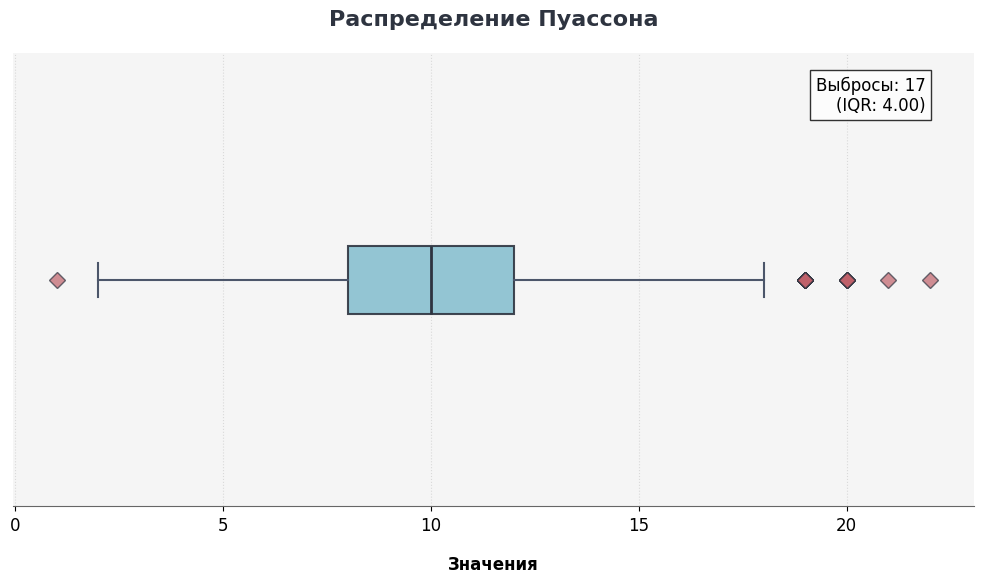

In [20]:
plot_boxplot(poisson_data,
            title='Распределение Пуассона',
            color='#88c0d0')

График подтверждает все полученные характеристики распределения. И так же выделяет  выбросы

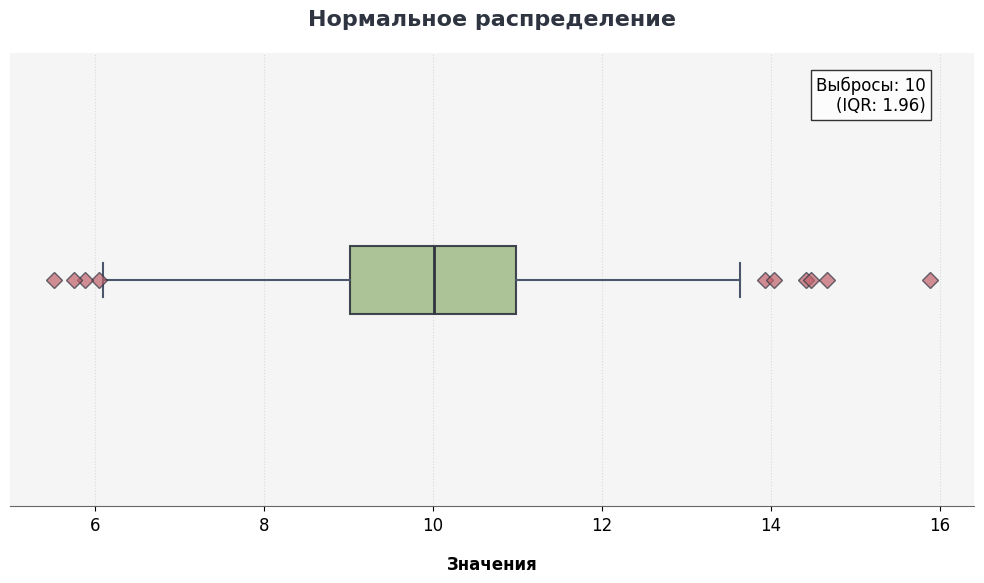

In [21]:
plot_boxplot(normal_data,
            title='Нормальное распределение',
            color='#a3be8c')

График почти идеально симметричен

## с)  Исследуйте устойчивость характеристик. Рассмотрите выборку из непрерывного распределения


### Добавьте к выборке 5% выбросов

Сделай выбросы тоже случайными

In [22]:
proportion = np.random.random()
left_left = np.random.randint(-100, -5)
left_right = np.random.randint(left_left, -5)
right_left = np.random.randint(5, 100)
right_right = np.random.randint(right_left, 100)

In [23]:
n_outliers = int(n * 0.05)
left_size = int(n_outliers * proportion)
right_size = n_outliers - left_size
left_outliers = np.random.uniform(left_left, left_right, left_size)
right_outliers = np.random.uniform(right_left, right_right, right_size)
combined_data = np.concatenate((normal_data, left_outliers, right_outliers))

### Пересчитайте статистики из пункта (a) и сравните с исходными

In [24]:
with_outliers_stats = get_stats(combined_data)
result = pd.concat([normal_stats, with_outliers_stats], axis=1, keys=['Без выбросов', 'С выбросами'])

In [25]:
result

,Без выбросов,С выбросами
,Значение,Значение
Статистический показатель,,
Q1,9.025793,9.057450
Q2,10.010397,10.087755
Q3,10.982684,11.115722
Выборочное среднее,10.008959,12.842225
Медиана,10.010397,10.087755
Мода,5.513296,-59.431014
Размах выборки,10.376061,143.380395
Интерквартильный размах,1.956890,2.058272


### Постройте графики изменения изменения мер вариабельности при постепенном добавлении выбросов

In [26]:
percent_steps = np.arange(0, 110, 10)
metrics = [
    'Размах выборки',
    'Интерквартильный размах',
    'Дисперсия',
    'Стандартное отклонение',
    'Коэффициент вариации',
    'Cреднее абсолютное отклонение'
]

In [27]:
percent_steps

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [28]:
results_stats = pd.DataFrame(index=percent_steps, columns=metrics)

for p in percent_steps:
    n_outliers_p = int(n * p / 100)
    if n_outliers_p == 0:
        current_data = normal_data.copy()
    else:
        left_size_p = int(n_outliers_p * proportion)
        right_size_p = n_outliers_p - left_size_p
        left_outliers_p = np.random.uniform(left_left, left_right, left_size_p)
        right_outliers_p = np.random.uniform(right_left, right_right, right_size_p)
        current_data = np.concatenate((normal_data, left_outliers_p, right_outliers_p))

    stats_p = get_stats(current_data)
    for metric in metrics:
        results_stats.loc[p, metric] = stats_p.loc[metric, 'Значение']

In [29]:
results_stats

,Размах выборки,Интерквартильный размах,Дисперсия,Стандартное отклонение,Коэффициент вариации,Cреднее абсолютное отклонение
0,10.376061,1.95689,2.205131,1.484968,0.148364,1.188949
10,140.403176,2.203646,441.901136,21.021445,1.36168,11.061832
20,143.327045,2.644306,761.289954,27.591483,1.382407,18.901781
30,143.464311,3.181111,991.049533,31.480939,1.319701,24.555623
40,142.493117,72.805179,1173.118799,34.250822,1.262066,28.724381
50,143.00165,73.040659,1310.9997,36.20773,1.207353,31.797185
60,143.173656,73.111991,1428.625931,37.797168,1.165218,34.134297
70,143.904374,73.199099,1513.625623,38.905342,1.123216,35.844099
80,143.69009,73.233513,1578.435415,39.729528,1.085608,37.102483
90,143.71065,73.209496,1626.403096,40.328688,1.051113,38.01961


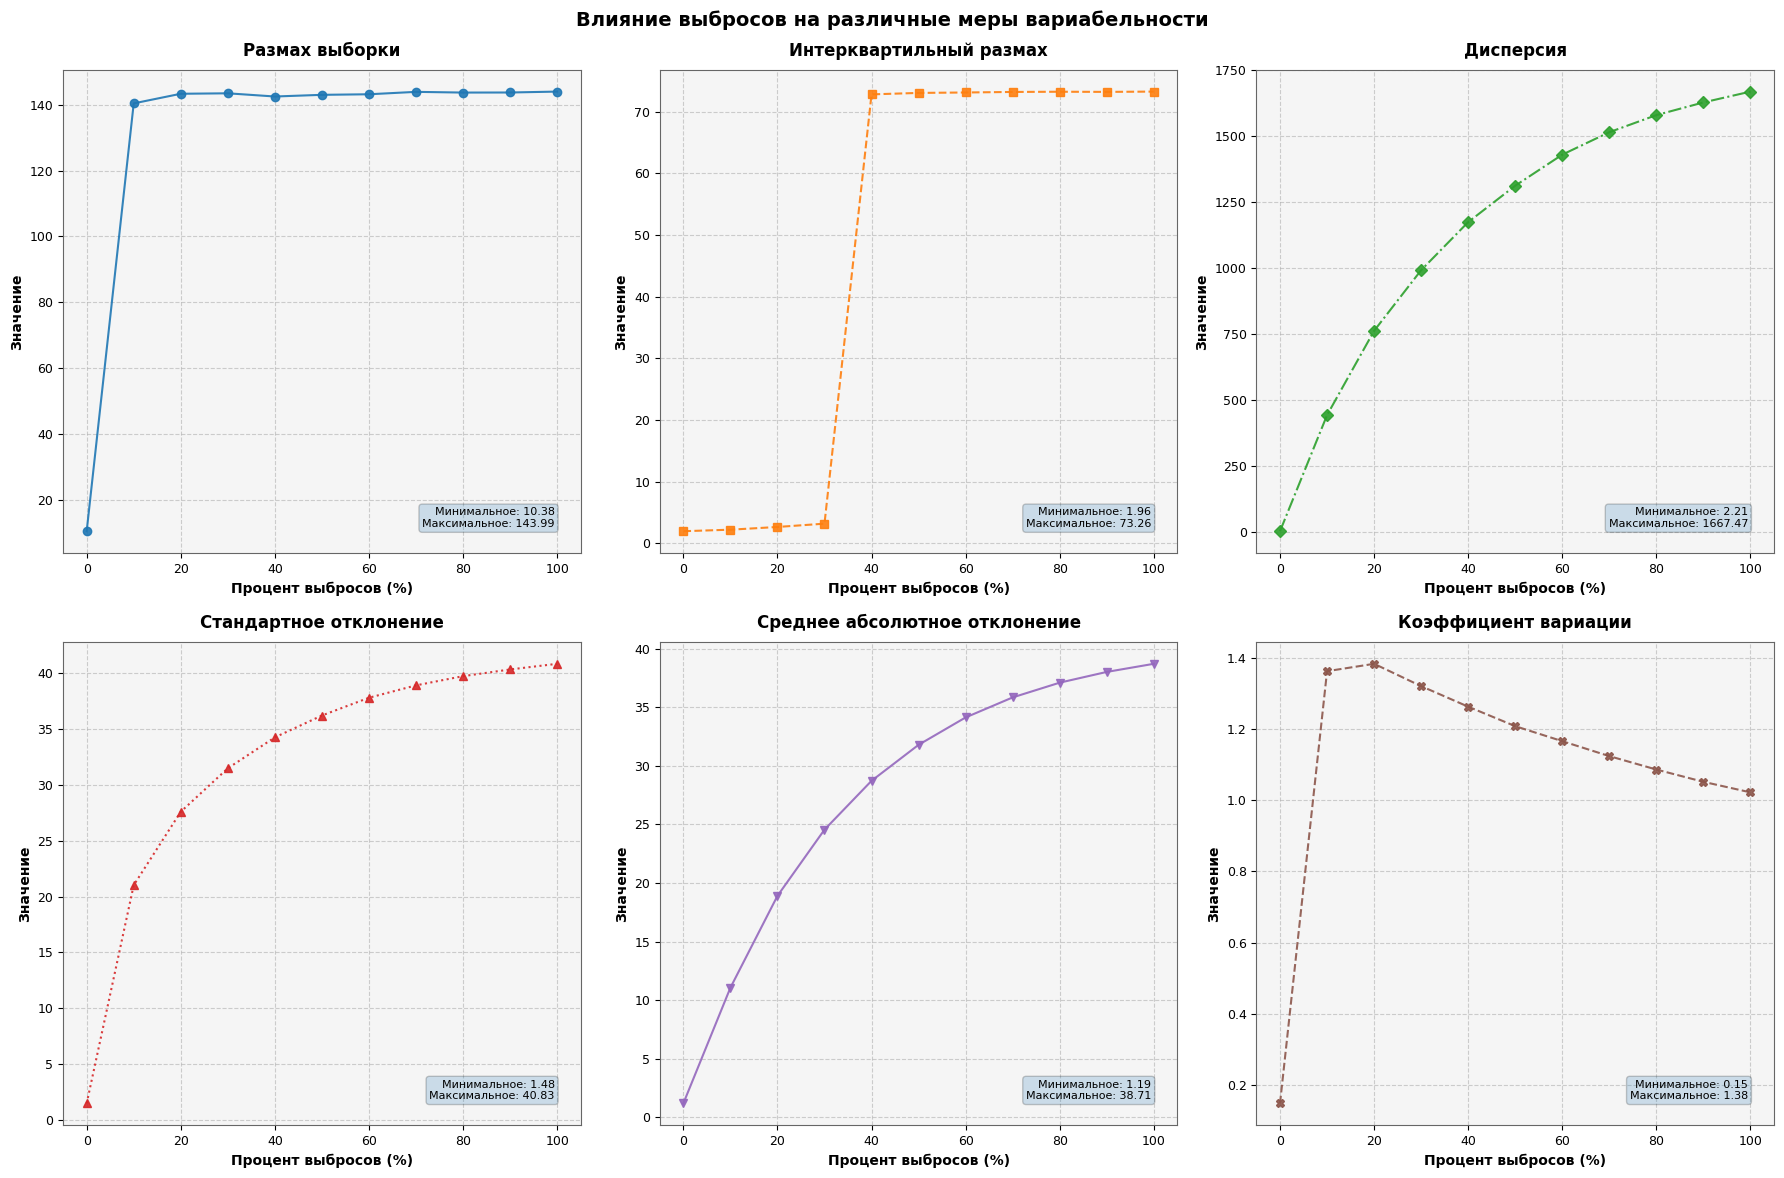

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
markers = ['o', 's', 'D', '^', 'v', 'X']
line_styles = ['-', '--', '-.', ':', '-', '--']
metrics = [
    'Размах выборки',
    'Интерквартильный размах',
    'Дисперсия',
    'Стандартное отклонение',
    'Cреднее абсолютное отклонение',
    'Коэффициент вариации'
]

for idx, (metric, ax) in enumerate(zip(metrics, axes.flatten())):
    ax.plot(
        percent_steps,
        results_stats[metric],
        marker=markers[idx],
        markersize=6,
        linewidth=1.5,
        linestyle=line_styles[idx],
        color=colors[idx],
        alpha=0.9
    )

    ax.set_title(metric, fontsize=12, pad=10, fontweight='bold')
    ax.set_xlabel('Процент выбросов (%)', fontsize=10)
    ax.set_ylabel('Значение', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', which='major', labelsize=9)

    min_val = results_stats[metric].min()
    max_val = results_stats[metric].max()
    ax.annotate(f'Минимальное: {min_val:.2f}\nМаксимальное: {max_val:.2f}',
                xy=(0.95, 0.05),
                xycoords='axes fraction',
                ha='right',
                va='bottom',
                fontsize=8,
                bbox=dict(boxstyle='round', alpha=0.2))

for ax in axes.flatten()[len(metrics):]:
    ax.remove()

plt.suptitle('Влияние выбросов на различные меры вариабельности',
             y=0.98,
             fontsize=14,
             fontweight='bold')
plt.tight_layout()
plt.show()

### Сделайте выводы об устойчивости этих характеристик.


-  Наименее чувствителен интерквартильный размах : он стабилен до определенного порога выбросов, так как основан на процентилях.

-  Среднее абсолютное отклонение : более устойчиво к выбросам, чем дисперсия и стандартное отклонение, но всё же подвержено их влиянию.

-  Дисперсия и стандартное отклонение: увеличиваются при добавлении выбросов, так как зависят от квадрата отклонения от среднего.

-  Коэффициент вариации: чувстивтелнен, но не особо: так какзначения имеют большую вариацию по сравнению со средним.

-  Наиболее чувствителен размах выборки: даже небольшое количество выбросов резко увеличивает его значение.